In [1]:
%env HF_ENDPOINT=https://hf-mirror.com
%env CUDA_VISIBLE_DEVICES=2

env: HF_ENDPOINT=https://hf-mirror.com
env: CUDA_VISIBLE_DEVICES=2


In [2]:
!echo $HF_ENDPOINT

https://hf-mirror.com


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import torch
from tqdm import notebook
from qwen_vl_utils import process_vision_info

from gill import models
from gill import utils

In [4]:
model_dir = 'runs/gill_exp'
model = models.load_gill(model_dir, load_ret_embs=False, decision_model_fn=None)
processor = model.model.processor

cc3m.npy files do not exist in runs/gill_exp.
Running the model without retrieval.
Adding [IMG0] token to vocabulary.
Before adding new token, tokenizer("[IMG0]") = {'input_ids': [58, 30346, 15, 60], 'attention_mask': [1, 1, 1, 1]}
After adding 1 new tokens, tokenizer("[IMG0]") = {'input_ids': [151657], 'attention_mask': [1]}
Adding [IMG1] token to vocabulary.
Before adding new token, tokenizer("[IMG1]") = {'input_ids': [58, 30346, 16, 60], 'attention_mask': [1, 1, 1, 1]}
After adding 1 new tokens, tokenizer("[IMG1]") = {'input_ids': [151658], 'attention_mask': [1]}
Adding [IMG2] token to vocabulary.
Before adding new token, tokenizer("[IMG2]") = {'input_ids': [58, 30346, 17, 60], 'attention_mask': [1, 1, 1, 1]}
After adding 1 new tokens, tokenizer("[IMG2]") = {'input_ids': [151659], 'attention_mask': [1]}
Adding [IMG3] token to vocabulary.
Before adding new token, tokenizer("[IMG3]") = {'input_ids': [58, 30346, 18, 60], 'attention_mask': [1, 1, 1, 1]}
After adding 1 new tokens, tokeni

Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}
`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Freezing the LM.
Freezing the VM.


/home/lxy/Documents/gill-vl/venv/lib/python3.9/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/home/lxy/Documents/gill-vl/venv/lib/python3.9/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/lxy/Documents/gill-vl/venv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.

dict_keys(['model.gen_text_hidden_fcs.0.fc.bias', 'model.gen_text_hidden_fcs.0.fc.weight', 'model.gen_text_hidden_fcs.0.model.bias', 'model.gen_text_hidden_fcs.0.model.weight', 'model.gen_text_hidden_fcs.0.query_embs', 'model.gen_text_hidden_fcs.0.tfm.decoder.layers.0.linear1.bias', 'model.gen_text_hidden_fcs.0.tfm.decoder.layers.0.linear1.weight', 'model.gen_text_hidden_fcs.0.tfm.decoder.layers.0.linear2.bias', 'model.gen_text_hidden_fcs.0.tfm.decoder.layers.0.linear2.weight', 'model.gen_text_hidden_fcs.0.tfm.decoder.layers.0.multihead_attn.in_proj_bias', 'model.gen_text_hidden_fcs.0.tfm.decoder.layers.0.multihead_attn.in_proj_weight', 'model.gen_text_hidden_fcs.0.tfm.decoder.layers.0.multihead_attn.out_proj.bias', 'model.gen_text_hidden_fcs.0.tfm.decoder.layers.0.multihead_attn.out_proj.weight', 'model.gen_text_hidden_fcs.0.tfm.decoder.layers.0.norm1.bias', 'model.gen_text_hidden_fcs.0.tfm.decoder.layers.0.norm1.weight', 'model.gen_text_hidden_fcs.0.tfm.decoder.layers.0.norm2.bias', 

In [5]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "你是谁？"},
        ],
    }
]
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
print(text)
inputs = processor(
    text=[text],
    images=None,
    videos=None,
    padding=True,
    return_tensors="pt",
)
print(inputs)
inputs = inputs.to("cuda")

<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
你是谁？<|im_end|>
<|im_start|>assistant

{'input_ids': tensor([[151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
         151645,    198, 151644,    872,    198, 105043, 100165,  11319, 151645,
            198, 151644,  77091,    198]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [6]:
g_cuda = torch.Generator(device='cuda').manual_seed(1337)
return_outputs = model.generate_for_images_and_texts(inputs, num_words=32, ret_scale_factor=1.0, generator=g_cuda)
return_outputs

['我是来自阿里云的大规模语言模型，我叫通义千问。']

In [7]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "A picture of a cat."},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
print(text)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
print(inputs)
inputs = inputs.to("cuda")

<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
A picture of a cat.<|im_end|>
<|im_start|>assistant

{'input_ids': tensor([[151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
         151645,    198, 151644,    872,    198,     32,   6802,    315,    264,
           8251,     13, 151645,    198, 151644,  77091,    198]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]])}


  0%|          | 0/50 [00:00<?, ?it/s]

[' [IMG0][IMG1][IMG2][IMG3][IMG4][IMG5][IMG6][IMG7]', {'gen': [(<PIL.Image.Image image mode=RGB size=512x512 at 0x7F0CE62DD9A0>, 0)], 'ret': [], 'decision': ['gen', [0, 1]]}]


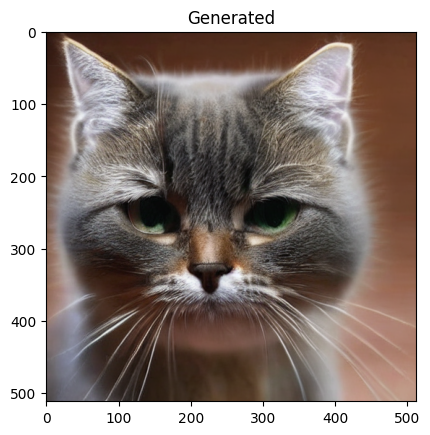

In [8]:
return_outputs = model.generate_for_images_and_texts(inputs, num_words=32, ret_scale_factor=100.0, generator=g_cuda)
print(return_outputs)
if return_outputs[1]['decision'][0] == 'gen':
    plt.imshow(return_outputs[1]['gen'][0][0])
    plt.title('Generated')
else:
    plt.imshow(return_outputs[1]['ret'][0][0].resize((512, 512)))
    plt.title(f"Retrieved")
plt.show()

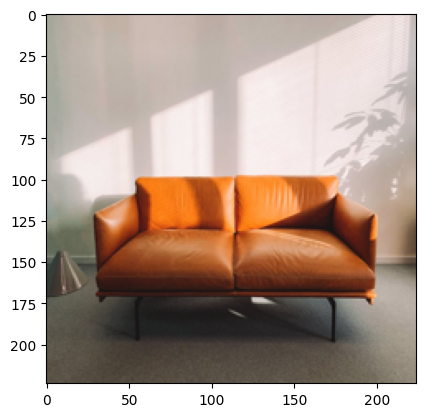

<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
<|vision_start|><|image_pad|><|vision_end|>a picture of this but in blue<|im_end|>
<|im_start|>assistant

{'input_ids': tensor([[151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
         151645,    198, 151644,    872,    198, 151652, 151655, 151653,     64,
           6802,    315,    419,    714,    304,   6303, 151645,    198, 151644,
          77091,    198]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1]])}


In [9]:
sofa_img = utils.get_image_from_url('https://images.pexels.com/photos/1866149/pexels-photo-1866149.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1')
# show the image
plt.imshow(sofa_img)
plt.show()

messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": sofa_img},
            {"type": "text", "text": "a picture of this but in blue"},
        ],
    }
]
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
print(text)
inputs = processor(
    text=[text],
    images=None,
    videos=None,
    padding=True,
    return_tensors="pt",
)
print(inputs)
inputs = inputs.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

[' [IMG0][IMG1][IMG2][IMG3][IMG4][IMG5][IMG6][IMG7]', {'gen': [(<PIL.Image.Image image mode=RGB size=512x512 at 0x7F0CE62FF4C0>, 0)], 'ret': [], 'decision': ['gen', [0, 1]]}]


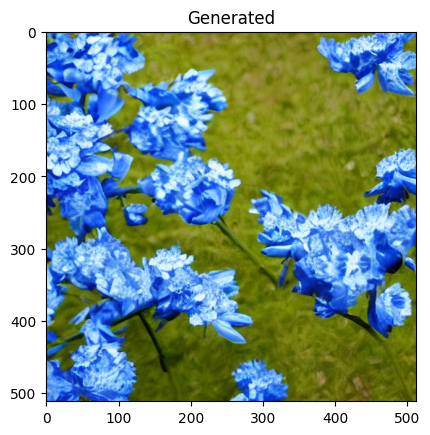

In [10]:
return_outputs = model.generate_for_images_and_texts(inputs, num_words=32, ret_scale_factor=100.0, generator=g_cuda)
print(return_outputs)
if return_outputs[1]['decision'][0] == 'gen':
    plt.imshow(return_outputs[1]['gen'][0][0])
    plt.title('Generated')
else:
    plt.imshow(return_outputs[1]['ret'][0][0].resize((512, 512)))
    plt.title(f"Retrieved")
plt.show()